In [1]:
# https://distill.pub/2016/misread-tsne/
# https://beta.observablehq.com/@nstrayer/t-sne-explained-in-plain-javascript

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_digits
data = load_digits()

In [4]:
print(data['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [5]:
len(data["target"])

1797

In [6]:
len(data.data[0])

64

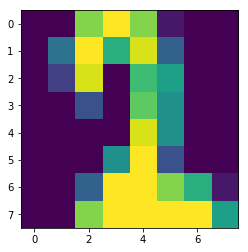

In [7]:
plt.imshow(data.data[1051].reshape((8,8)))

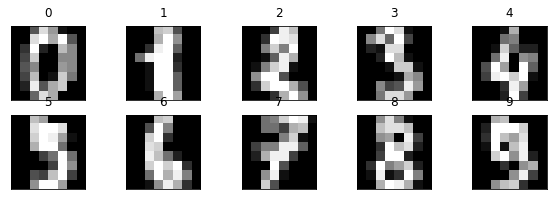

In [8]:
digits =data
nrows, ncols = 2, 5
plt.figure(figsize=(10,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])
plt.show()

In [9]:
len(digits.data)

1797

In [10]:
len(digits.data[0])

64

In [11]:
digits.target[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
digits.data.shape

(1797, 64)

In [14]:
from sklearn.manifold import TSNE
RS=20150102
%time data2d = TSNE(random_state=RS).fit_transform(digits.data)

CPU times: user 31.6 s, sys: 3.19 s, total: 34.8 s
Wall time: 35.3 s


In [15]:
df = pd.DataFrame(data2d)
df.columns=["x","y"]
df['target']=digits.target

In [16]:
df.head()

,x,y,target
0,-32.437584,-47.373165,0
1,25.295258,15.074515,1
2,17.698441,-15.252165,2
3,-16.933418,-6.956354,3
4,32.847641,41.176861,4


In [17]:
from sklearn.preprocessing import minmax_scale

In [18]:
df[["x","y"]]=minmax_scale(df[["x","y"]])

In [19]:
import altair as alt
alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

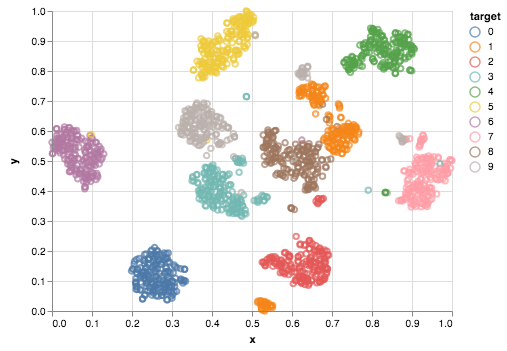

In [20]:
alt.Chart(df).mark_point().encode(
 x="x",
 y="y",
 color="target:N",
 tooltip="target:N"
)

In [21]:
np.sqrt(len(digits.data))

42.391036788453285

In [22]:
side=45

In [23]:
xv, yv = np.meshgrid(np.linspace(0, 1, side), np.linspace(0, 1, side))
grid = np.dstack((xv, yv)).reshape(-1, 2)

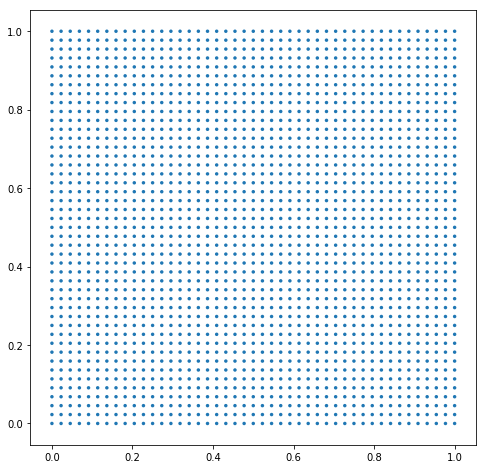

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(grid[:,0], grid[:,1], edgecolors='none', marker='o', s=12)
plt.show()

In [25]:
print(grid.shape)
print(data2d.shape)

(2025, 2)
(1797, 2)


CPU times: user 20.1 ms, sys: 10.7 ms, total: 30.8 ms
Wall time: 30.8 ms


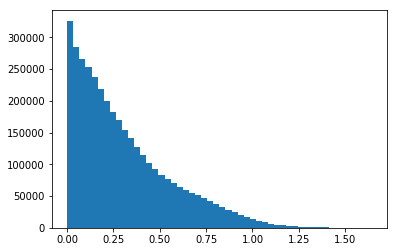

In [26]:
from scipy.spatial.distance import cdist
%time cost = cdist(grid, df[["x","y"]].values, 'sqeuclidean')
plt.hist(cost.flatten(), bins=50)
plt.show()

In [27]:
cost = cost * (10000000. / cost.max())

In [28]:
# https://github.com/kylemcdonald/CloudToGrid/blob/master/CloudToGrid.ipynb
# https://anaconda.org/bioconda/lap
import lap

(1797,)


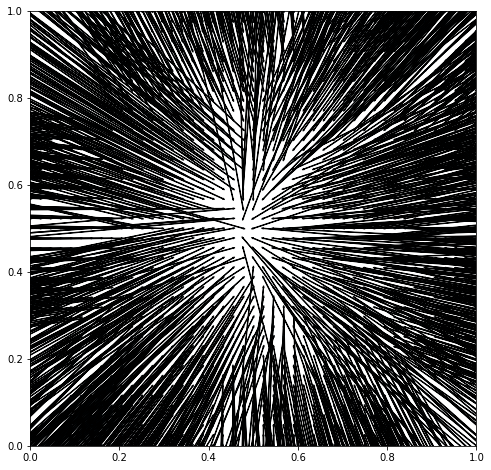

In [29]:
min_costmin_cos , row_assigns, col_assigns = lap.lapjv(np.copy(cost),extend_cost=True)
grid_jv = grid[col_assigns]
print (col_assigns.shape)
plt.figure(figsize=(8, 8))
for start, end in zip(data2d, grid_jv):
    plt.arrow(start[0], start[1], end[0] - start[0], end[1] - start[1])
plt.show()

In [30]:
dfg = pd.DataFrame(grid_jv)
dfg.columns=["x","y"]
dfg['target']=digits.target

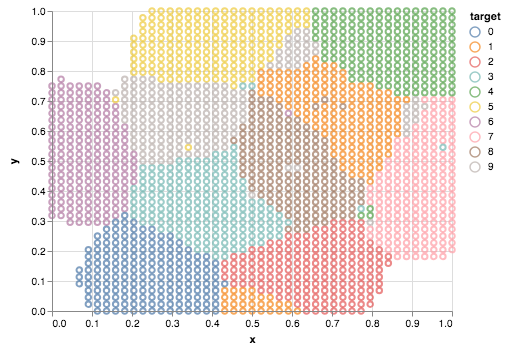

In [31]:
alt.Chart(dfg).mark_point().encode(
 x="x",
 y="y",
 color="target:N",
 tooltip="target:N"
)

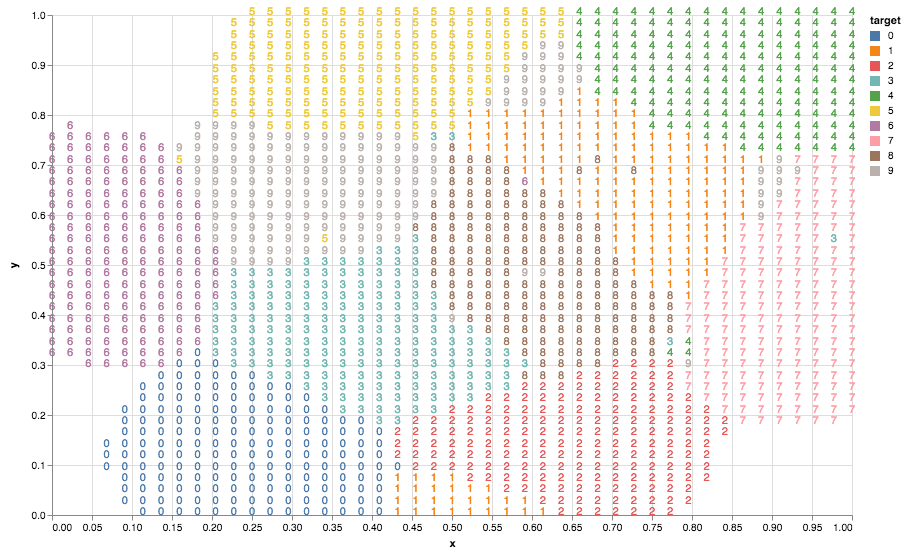

In [32]:
alt.Chart(dfg).mark_text().encode(
 x="x",
 y="y",
 color="target:N",
 text="target:N"
).properties(
 width=800,
 height=500
)

## Using the PIL image library

```python

# Load an image
im = Image.open("surf.jpg")

# Create an image from an array
im = Image.fromarray(data.data[i].reshape((8,8)), 'L')

# Draw a line
draw = ImageDraw.Draw(im)
draw.line((0, 0,10,20), fill=128)

# Draw an image
background.paste(im,(8*col,8*row,8*col+8,8*row+8))

# Save an image
im.save("im.png","PNG)
```

In [33]:
from PIL import Image
from IPython.display import Image as imdisplay

In [34]:
background = Image.new("L", (45*8, 45*8), "white")
for i in range(0,len(data.data)):
    d = data.data[i].reshape((8,8))
    d = (255/16)*(16-d)
    img = Image.fromarray(d.astype("uint8"), 'L')
    col = int(i/45)
    row = int(i%45)
    background.paste(img,(8*col,8*row,8*col+8,8*row+8))
background.save("original.png","PNG")

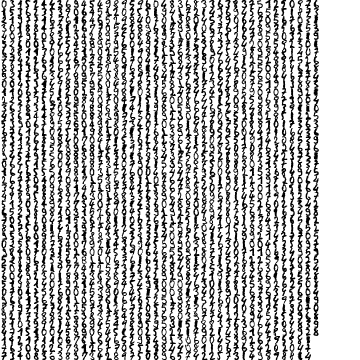

In [35]:
imdisplay("original.png")

In [36]:
background = Image.new("L", (45*8, 45*8), "white")
for i,v in enumerate(minmax_scale(df[["x","y"]])):
    d = data.data[i].reshape((8,8))
    d = (255/16)*(16-d)
    img = Image.fromarray(d.astype("uint8"), 'L')
    col = int(v[0]*45)
    row = int(v[1]*45)
    background.paste(img,(8*col,8*row,8*col+8,8*row+8))
background.save("tsne.png","PNG")

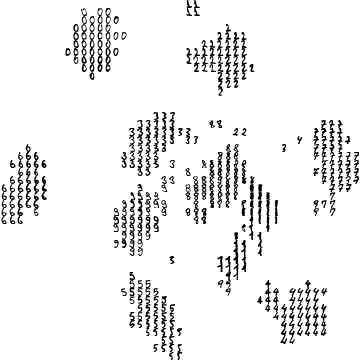

In [37]:
imdisplay("tsne.png")

In [38]:
background = Image.new("L", (45*8, 45*8), "white")
for i,v in enumerate(grid_jv):
    d = data.data[i].reshape((8,8))
    d = (255/16)*(16-d)
    img = Image.fromarray(d.astype("uint8"), 'L')
    col = int(v[0]*45)
    row = int(v[1]*45)
    background.paste(img,(8*col,8*row,8*col+8,8*row+8))
background.save("tsne_grid.png","PNG")

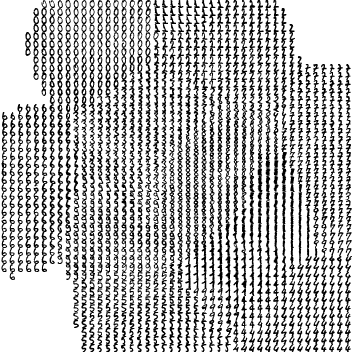

In [39]:
imdisplay("tsne_grid.png")